# Geographic Stability

Since I want to see how the demographics in my hometown changed over time, I need to understand whether the borders of the geography I am using to approximate my hometown changed over time. As a reminder, the geography I am planning to use is my school district (`Great Neck Union Free School District, New York`, ID `12510` in State `36`).

I plan to start this analysis using the American Community Survey (ACS). Data on school districts is only published for the 5-year estimates. The first 5-year estimate was published in 2009 and the most recent was published in 2023. You are not supposed to compare overlapping years, which means that I only view one year in between the first and last. I will choose the 2016, as it is the midpoint. 

It appears that the Census API does not return a map for 2009, so this notebook compares the maps from 2009, 2016 and 2023. The boundaries appear to have not changed, so I don't have to worry about a comparison over time being due to changing boundaries.

In [1]:
import censusdis.data as ced
import censusdis.maps as cem

from censusdis.datasets import ACS5
from censusdis.states import NY


def print_map_for_year(year):
    gn_school = ced.download(
        dataset=ACS5,
        vintage=year,
        group="B03002",
        state=NY,
        school_district_unified="12510",
        with_geometry=True,
    )

    ax = cem.plot_map(
        gn_school,
        color="purple",
        alpha=0.1,
        figsize=(10, 10),
        with_background=True,
        geo_label="NAME",
        geo_label_text_kwargs={"size": 6},
    )
    ax = cem.plot_map(gn_school.boundary, color="purple", linewidth=1.0, ax=ax)

    ax.set_title(f"Map for {year}")

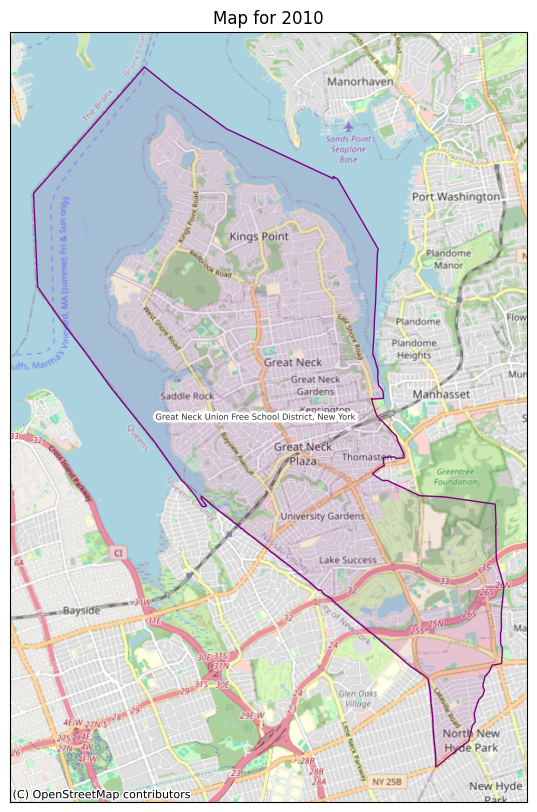

In [2]:
print_map_for_year(2010)

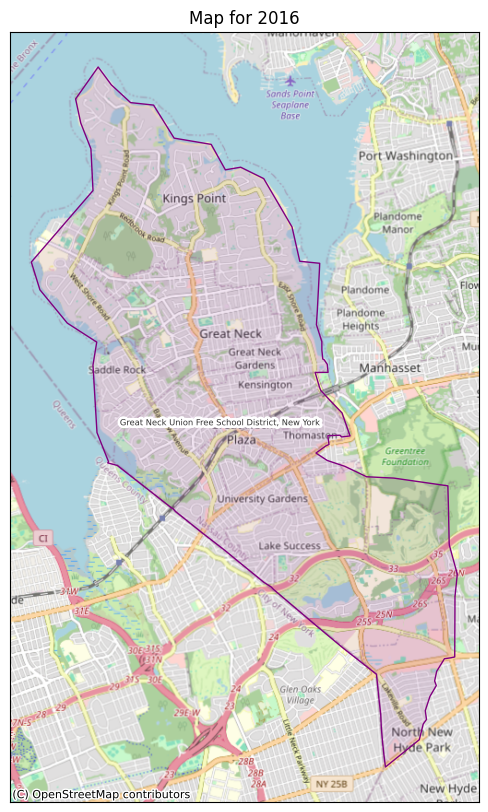

In [3]:
print_map_for_year(2016)

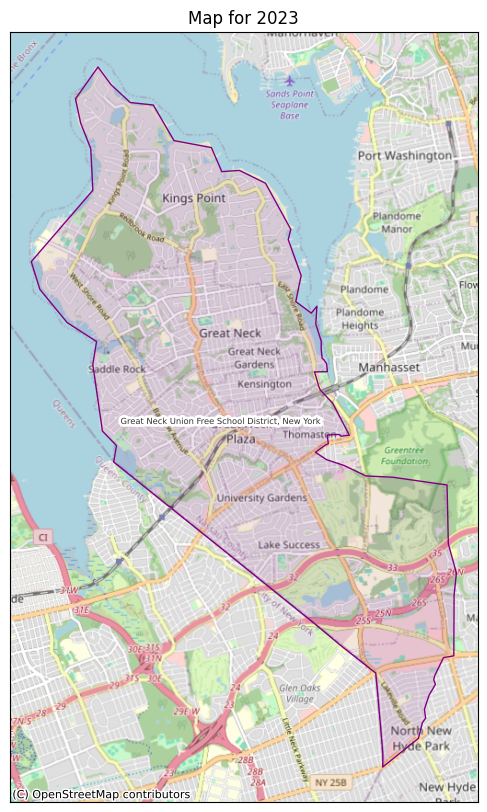

In [4]:
print_map_for_year(2023)